In [58]:
from IPython.display import HTML

HTML(
    """
<script
    src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js ">
</script>
<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
 } else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit"
    value="Click here to toggle on/off the raw code."></form>
"""
)

In [3]:
import fim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

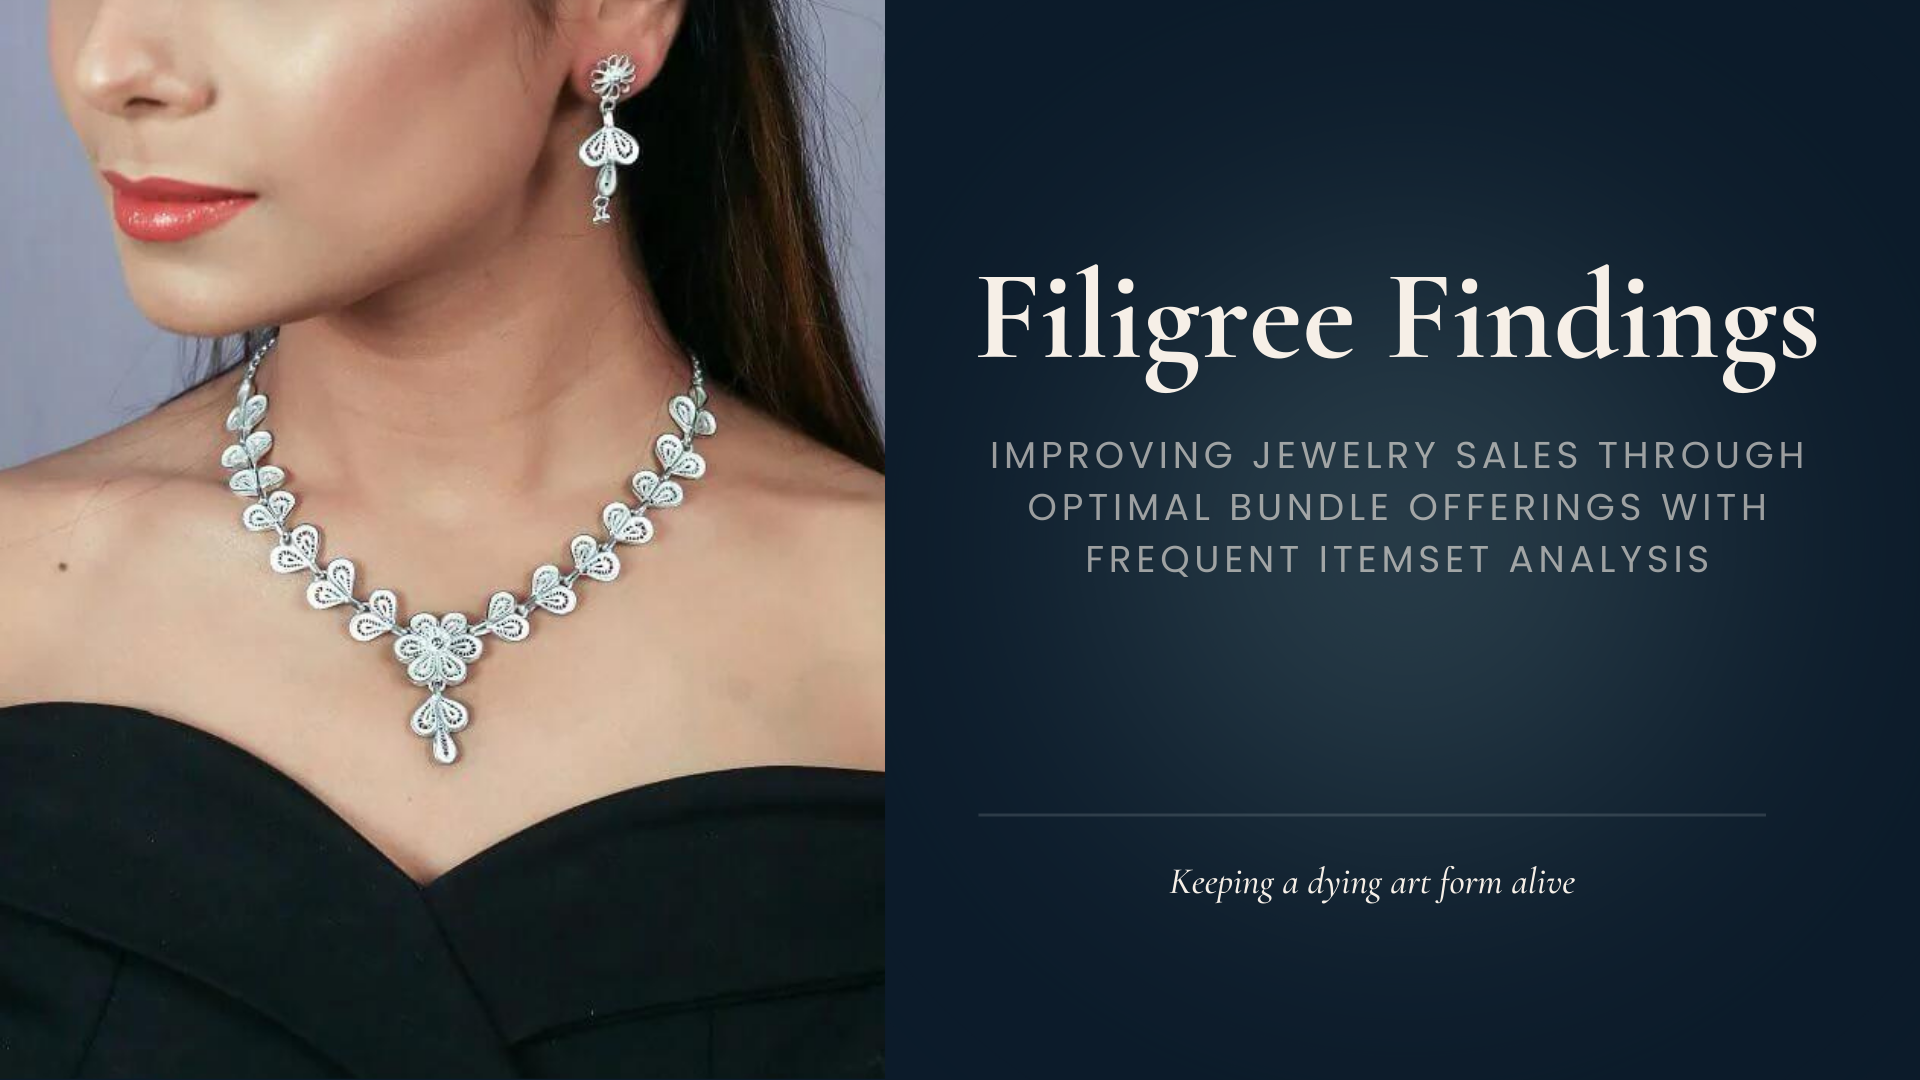

<a name="top"></a>
#### Table of Contents:

- [Abstract](#abstract-section)
- [Problem Statement](#problem-statement-section)
- [Motivation](#motivation-section)
- [Data Source](#data-source-section)
- [Methodology](#methodology-section)
- [Data Exploration](#data-exploration-section)
- [Data Preprocessing](#data-preprocessing-section)
- [Frequent Itemset Mining Implementation](#frequent-itemset-mining-implementation-section)
- [Association Rules Interpretation](#association-rules-interpretation-section)
- [Recommended Product Bundles](#recommended-product-bundles-section)
- [Conclusions and Insights](#conclusions-and-insights-section)
- [References](#references)- [Abstract](#abstract-section)
- [Problem Statement](#problem-statement-section)
- [Motivation](#motivation-section)
- [Data Source](#data-source-section)
- [Methodology](#methodology-section)
- [Data Exploration](#data-exploration-section)
- [Data Preprocessing](#data-preprocessing-section)
- [Frequent Itemset Mining Implementation](#frequent-itemset-mining-implementation-section)
- [Results and Discussion](#results-and-discussion-section)
- [Recommendations and Limitations](#recommendations-and-limitations-section)
- [Conclusions and Insights](#conclusions-and-insights-section)
- [References](#references-section)
- [Recommended Bundles](#recommended-bundles-section)

<a name="abstract-section"></a>

<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Abstract</h1>
</div>

This study explores the application of association rule mining techniques to analyze sales data from Silver Linings, a local business in Hyderabad, India, dedicated to the preservation and promotion of the traditional art of filigree jewelry making. Over a span of seven years, the sales data were meticulously examined to identify patterns and relationships between various jewelry items, with the aim of generating actionable insights for product bundling and customer base expansion. Employing advanced algorithms such as FP-Growth, the research delves into transactional data to unveil hidden synergies among products. The analysis distinguishes between peak and normal sales seasons, reflecting the influence of cultural festivities and everyday consumer behavior on jewelry demand. The findings underscore the significant role of seasonal trends in shaping purchasing patterns, offering a strategic framework for Silver Linings to optimize their product offerings and enhance their market position.

<a name="problem-statement-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Problem Statement</h1>
</div>

In the competitive landscape of jewelry retail, maximizing sales and enhancing customer satisfaction are of paramount importance. Traditional bundling strategies often fail to capture the nuanced preferences of shoppers, leading to missed opportunities and suboptimal revenue generation. This project endeavors to redefine jewelry retailing by leveraging cutting-edge association rule mining techniques, such as FP-Growth and Apriori algorithms.

By analyzing transactional data from Silver Linings, the researchers aim to uncover hidden patterns and relationships between jewelry items, thereby illuminating opportunities for strategic product bundling. Their data-driven approach has the potential to revolutionize the way Silver Linings crafts its product offerings.

Employing the lens of association rule mining, the project seeks to not only boost sales but also to enhance customer satisfaction and loyalty. With these insights, Silver Linings can curate product bundles that not only aim to maximize revenue but also foster enduring relationships with its clientele.

<a name="motivation-section"></a>

<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Motivation</h1>

The motivation for this data science study is driven by a recognition of the cultural significance and the precarious state of traditional filigree jewelry-making in India. As an art form with centuries-old roots, filigree work is confronted with challenges posed by the mainstream and mass-produced jewelry and the diminishing number of skilled artisans. The preservation of such intricate craftsmanship is not only a matter of cultural heritage but also of socioeconomic importance to the communities involved in its creation.

The objective of this study is to employ data analytics to garner insights for Silver Lingings and their mission to contribute to the revitalization and sustainability of the filigree jewelry industry. It is anticipated that analyzing sales data will reveal underlying patterns that can inform strategic business decisions for them. It is posited that data-driven strategies can aid in enhancing the economic viability of artisanal crafts and ensure their continued presence in the market.

It is also envisioned that the integration of data science with traditional craftsmanship will shed light on the potential of modern methodologies to add value to cultural artifacts. This research is positioned at the intersection of cultural preservation and technological advancement, seeking to demonstrate how traditional industries can be empowered through data-driven innovation. Through this study, it is hoped that a contribution will be made not only to the survival of the filigree craft but also to the broader effort of keeping India's rich artisanal heritage alive for future generations.

<a name="data-source-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Data Source</h1>
</div>

The dataset was obtained directly from the SilverLinings company owners. The initial dataset lists 11,000 item transactions across 50 columns, containing information such as customer details, billing, and shipping information. However, as will be observed later, not all features will be utilized. For the purpose of this study, the focus will be on transactional and product-related data that are pertinent to identifying purchasing patterns and behaviors. 

Features irrelevant to the association rule mining, such as personal customer information, will be excluded to maintain privacy and comply with data protection regulations. The selection and preprocessing of the relevant data are critical steps that will ensure the integrity and validity of the analytical models employed. The refined dataset will enable a robust analysis of purchasing trends, revealing insights that could lead to more effective product placement, personalized marketing strategies, and optimized inventory management for SilverLinings.

In [4]:
df = pd.read_csv("sl_orders.csv", parse_dates=True, low_memory=False)
display(df.head())
display(HTML("<center><i>Table 1. Dataset Preview</i></center>"))

Name                    Paid at Accepts Marketing Currency  Subtotal  \
0  #8177  2024-02-15 10:55:25 +0530                no      INR    4800.0   
1  #8176  2024-02-14 13:11:57 +0530               yes      INR    2520.0   
2  #8175  2024-02-14 12:54:31 +0530               yes      INR    1280.0   
3  #8174  2024-02-14 02:48:27 +0530                no      INR       8.0   
4  #8173  2024-02-13 16:38:38 +0530               yes      INR    2808.0   

   Shipping   Taxes   Total Discount Code  Discount Amount  ... Tax 4 Value  \
0     700.0  139.81  5500.0           NaN              0.0  ...         NaN   
1       0.0   73.40  2520.0           NaN              0.0  ...         NaN   
2       0.0   37.28  1280.0           NaN              0.0  ...         NaN   
3       0.0    0.23     8.0           NaN              0.0  ...         NaN   
4       0.0   81.79  2808.0           NaN              0.0  ...         NaN   

  Tax 5 Name  Tax 5 Value         Phone  Receipt Number  Duties  \
0        NaN          NaN           NaN             NaN     NaN   
1        NaN          NaN           NaN             NaN     NaN   
2        NaN          NaN           NaN             NaN     NaN   
3        NaN          NaN  9.199710e+11             NaN     NaN   
4        NaN          NaN           NaN             NaN     NaN   

                  Payment ID  Payment Terms Name  Next Payment Due At  \
0  rv1aNObeEz15kTvgvP7lqGOpr                 NaN                  NaN   
1  rSo9NIJNwwxPd6EXrGB9DciPl                 NaN                  NaN   
2  rtEiFmdnHYy9pqg9mw4FKMLma                 NaN                  NaN   
3  r0uPHP4eWrBzBL0Il1ZoXCOm9                 NaN                  NaN   
4  rsHJLQcT8RSMspSEGQBrdGTmy                 NaN                  NaN   

                                  Payment References  
0  rv1aNObeEz15kTvgvP7lqGOpr + x1EIiy3wXArrAcMmKx...  
1                          rSo9NIJNwwxPd6EXrGB9DciPl  
2                          rtEiFmdnHYy9pqg9mw4FKMLma  
3                          r0uPHP4eWrBzBL0Il1ZoXCOm9  
4                          rsHJLQcT8RSMspSEGQBrdGTmy  

[5 rows x 50 columns]

<a name="methodology-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Methodology</h1>
</div>

***
[ref]: #top
[Back to Table of Contents][ref]

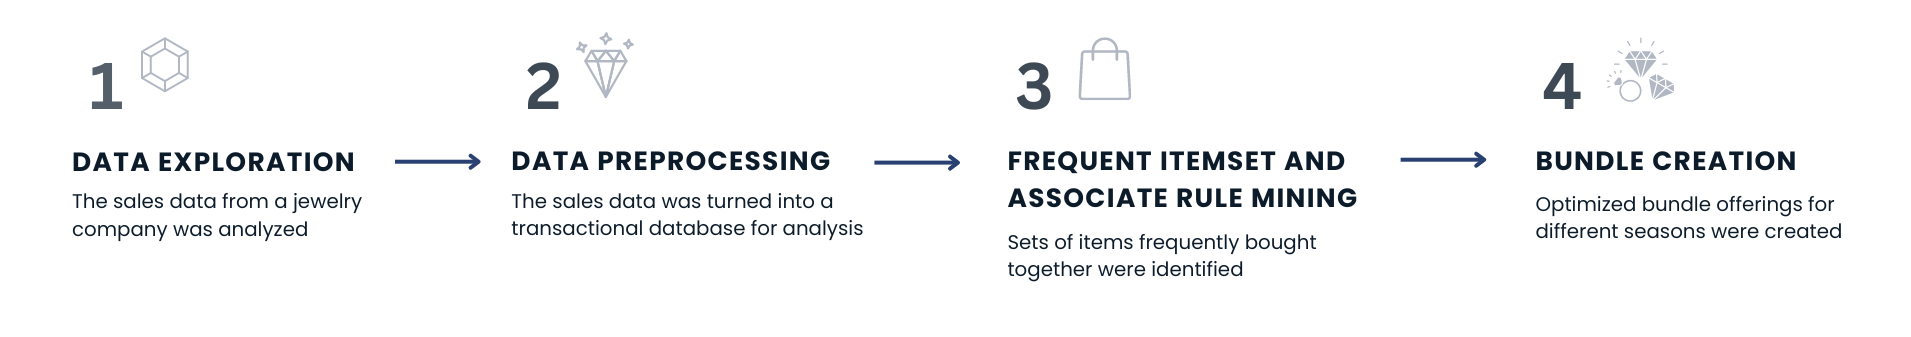

<a name="data-exploration-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Data Exploration</h1>
</div>

***
[ref]: #top
[Back to Table of Contents][ref]

During the examination of item names and SKUs, NaN (Not a Number) values were discovered, indicating missing information. Upon consultation with the business owners of SilverLinings, it was revealed that these discrepancies were attributable to errors in the encoding process of the SKUs. Consequently, the `Lineitem name` field was identified as a more reliable source for item identification in transactions.

In [5]:
df[['Name', 'Paid at',"Lineitem name",'Lineitem sku']].isna().sum()

Name                0
Paid at          5406
Lineitem name       0
Lineitem sku      157
dtype: int64

`Figure 1` shows the total sales count of individual products. It can be seen that Classic Floral stands out, alongside the Saree Pin and Swaying and Graceful-silver, already we can see an initial offering of perhaps products that might be bundled together given their popularity relative to sales.  

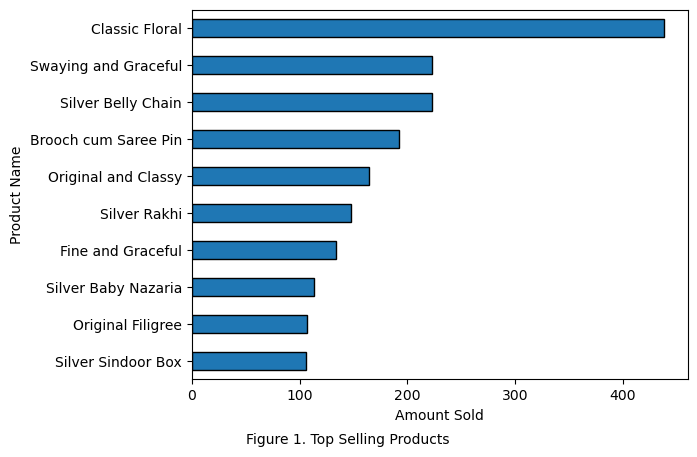

In [45]:
df["Lineitem name"].value_counts()[:10][::-1].plot(
    kind="barh", edgecolor="black",
)
plt.xlabel('Amount Sold')
plt.ylabel('Product Name')
plt.text(50, -2.25, 'Figure 1. Top Selling Products');

In `Figure 2`, the sales data across time were plotted, revealing that in instances where a user purchased multiple items in a single transaction, only the data for the first item were considered, leading to the exclusion of subsequent items from being recognized as purchased on the same date. To address this issue, a forward fill method was employed, ensuring that all items in a transaction were accurately indicated as being paid for on the same date, thereby including them in the distribution analysis.

Following this adjustment, a more accurate plot of Silver Linings' sales over time was produced. Notably, a significant spike in sales was observed during the sixth, seventh, and eighth months, a pattern that was consistent across several years, with the exception of 2020. In 2020, although a similar pattern was noticeable, the volume of sales was markedly lower, which could be attributed to the impact of the Global Pandemic during that period. This analysis suggests that while seasonal trends significantly influence the sales of Silver Linings, external factors such as global events can have a profound effect on consumer behavior and overall sales performance.

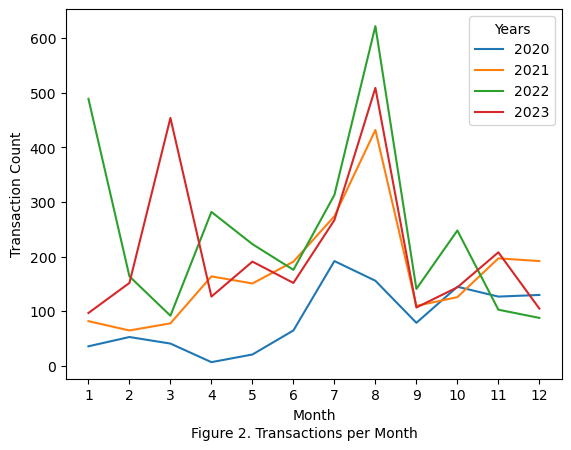

In [7]:
df["Paid at"] = pd.to_datetime(df["Paid at"])
df["Paid at"] = df["Paid at"].dt.strftime("%Y-%m")
df["Paid at"].ffill(inplace=True)
fig, ax = plt.subplots()
labels = []
for i in range(2020, 2024):
    globals()[f"df_{i}"] = df.loc[
        np.where(df["Paid at"].str.contains(str(i)) == True)
    ]
    globals()[f"df_{i}"]["Paid at"].value_counts().sort_index().plot(ax=ax)

    labels.append(str(i))
ax.set_xticks(np.arange(0, 12))
ax.set_xticklabels([str(month) for month in range(1, 13)])

ax.legend(labels, title="Years")
ax.set_xlabel("Month")
ax.set_ylabel('Transaction Count')
plt.text(2.5, -130, 'Figure 2. Transactions per Month');

<a name="data-preparation-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Data Preprocessing</h1>
</div>

***
[ref]: #top
[Back to Table of Contents][ref]

It was known through conversations with the business that there were several dummy values still contained within the data, as it contained all their transactions including their test transactions when they were establishing their database.  The cell below removes these dummy  values to ensure the data contains only actual transactions from customers.t was known through conversations with the business that there were several dummy values still contained within the data, as it contained all their transactions including their test transactions when they were establishing their database.  The cell below removes these dummy  values to ensure the data contains only actual transactions from customers.

In [8]:
index_dummy = (
    df["Lineitem name"].str.extract(r"(?i)(dummy)").dropna().index.tolist()
)
index_test = (
    df["Lineitem name"].str.extract(r"(?i)(test)").dropna().index.tolist()
)
index_dummy.extend(index_test)
df.drop(index=index_dummy, inplace=True)

In [9]:
df["Lineitem name"] = df["Lineitem name"].apply(
    lambda x: x.split("(")[0].split("-")[0].strip()
)

Several products contained an extra label indicating them as variants of the main product, such as the top product ‘Classic Floral – Silver'. The purpose of removing this to simply offer a more robust offering to the customer and to the business. On the website of Silver Linings should a product have variants, customers will have the choices available to them on the page of the specific product should they examine it

In [10]:
df_678 = df.iloc[np.where(df["Paid at"].str.contains(r"\d{4}-0[678]") == True)]
df_others = df.drop(df_678.index)

 Due to the observed spike in sales across the years, the dataset was split into three parts. First, the data was considered as a whole. The second part were those months that contained the spike were referred to as the **peak season**, while those outside of this were referred to as the **regular season**.
 
Peak Season - The  period is commonly known as the Peak season, which holds significance primarily due to its association with religious observances and wedding ceremonies within the country. These occasions directly impact the demand for jewelry, as it is frequently exchanged as gifts during large family gatherings and purchased extensively for ceremonial wear. Consequently, this leads to a substantial surge in sales, contributing significantly to the business's overall performance during this period. 

Normal season – During a normal season, while there may not be as many significant religious or wedding festivities, there remains a steady demand for jewelry. This demand is driven by various factors such as personal milestones, everyday celebrations, and the timeless appeal of jewelry as a form of self-expression and adornment. Although the sales may not reach the same peaks as during peak seasons, they provide a consistent flow of revenue that sustains the business throughout the year.

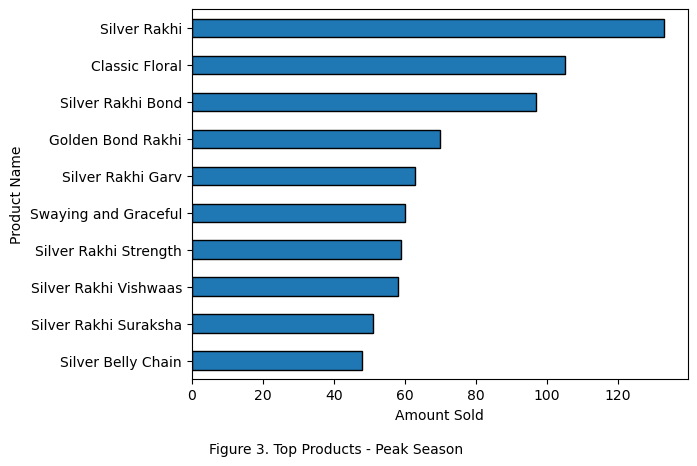

In [35]:
df_678["Lineitem name"].value_counts()[:10][::-1].plot(
    kind="barh", edgecolor="black"
)
plt.xlabel('Amount Sold')
plt.ylabel('Product Name');
plt.text(5, -2.5, 'Figure 3. Top Products - Peak Season');

The split data was examined to observe the distribution of products and their respective sales numbers. It was observed that classic floral was constant between the seasons, however during the peak season eight out of ten products were of the Silver Rakhi product line.  On the other hand the standard season showed more varied products. 

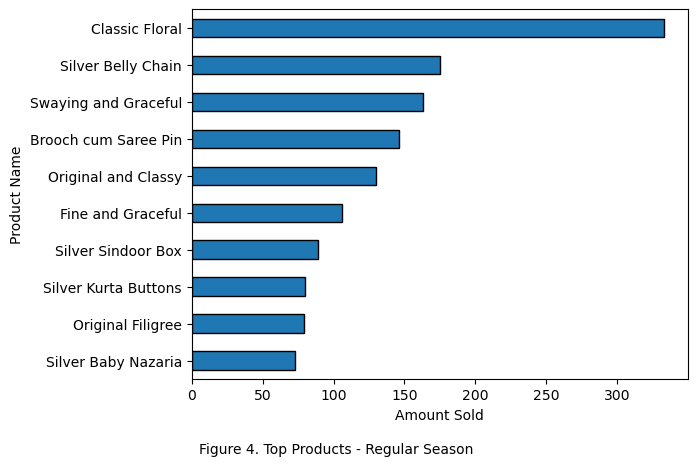

In [39]:
df_others["Lineitem name"].value_counts()[:10][::-1].plot(
    kind="barh", edgecolor="black"
)
plt.xlabel('Amount Sold')
plt.ylabel('Product Name');
plt.text(5, -2.5, 'Figure 4. Top Products - Regular Season');

The three seasons were stored in three seperate dataframes labeled: `df_itemset`,  `df_in_season` and `df_off_season`.

In [13]:
df_itemset = df.groupby("Name")["Lineitem name"].apply(set).to_frame()
df_in_season = df_678.groupby("Name")["Lineitem name"].apply(set).to_frame()
df_off_season = (
    df_others.groupby("Name")["Lineitem name"].apply(set).to_frame()
)

<a name="frequent-itemset-mining-implementation-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Frequent Itemset Mining Implementation</h1>
</div>

***

[ref]: #top
[Back to Table of Contents][ref]

The maximal frequency sets of the peak season were taken with the use of the pyfim package. The hyperparameters used were `target="m"` to return the those sets of maximal frequency, a minimum of `-5` supports were set as the threshold with the negative indicating the absolute number of transactions. The `zmin=2` ensures that the minimum items contained must be two.  

In this example the support was set to 5 because it covered the peak season which is one quarter. However, upon consultation with Silver Linings it was communicated that their business considered a good sale to be five sales per item.  

To ensure all itemsets could be viewed, the dataframe viewing options were set to ‘None’ to prevent truncation of rows and columns. 

In [59]:
max_sets_in = pd.DataFrame(
    fim.fpgrowth(
        df_in_season["Lineitem name"].apply(list), 
        target="m", 
        supp=-5, 
        zmin=2
    ),
    columns=["Itemset", "Support"],
)
with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    display(HTML(f"<center>{max_sets_in.to_html()}" "<i>Table 2 - Peak Season</i></center>"))

The maximal frequency sets of the standard season were taken with the use of the pyfim package. The hyperparameters used were `target="m"` to return the those sets of maximal frequency, a minimum of `-15` supports were set as the threshold with the negative indicating the absolute number of transactions. The `zmin=2` ensures that the minimum items contained must be two.  

In this example the support was set to 15 because it covered the regular season which is three quarters.To ensure all itemsets could be viewed, the dataframe viewing options were set to ‘None’ to prevent truncation of rows and columns. 

In [60]:
max_sets_off = pd.DataFrame(
    fim.fpgrowth(
        df_off_season["Lineitem name"].apply(list),
        target="m",
        supp=-15,
        zmin=2,
    ),
    columns=["Itemset", "Support"],
)
with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    display(
        HTML(f"<center>{max_sets_off.to_html()}" "<i>Table 3 - Regular Season</i></center>")
    )

For the entire dataset, the support considered a four quarter year at ‘-20’ and a confidence of 75 to account for risk of the peak season but also the stability of the regular season. 

In [62]:
max_sets = pd.DataFrame(
    fim.fpgrowth(
        df_itemset["Lineitem name"].apply(list), target="m", supp=-20, zmin=2
    ),
    columns=["Itemset", "Support"],
)
with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    display(HTML(f"<center>{max_sets.to_html()}" "<i>Table 4 - Full Season</i></center>"))

Fpgrowth was utilized due to its faster computation time. This is to account for the eventual growth of the dataset.

<a name="results-and-discussion-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Results and Discussion</h1>
</div>

***
[ref]: #top
[Back to Table of Contents][ref]

The dataset was segmented into three parts, corresponding to different sales seasons, a categorization established through an initial analysis of data distribution. For each season, both the minimum support thresholds and confidence levels were adjusted. This strategy was informed by discussions with the business, which indicated that selling an item five times within a quarter was deemed satisfactory. Consequently, the year was divided into four quarters, and for the **peak** season—which aligns with a single quarter—the minimum support threshold was established at five. The confidence level was set at 60% to mitigate the risk associated with creating bundles overly tailored to the festive season, ensuring that the product offerings remain balanced and reflective of broader consumer interests throughout the year.

Given the relatively low threshold for supports, combined with four years of sales data, a substantial number of bundles were generated. Notably, the Lift values of the top 10 bundles are exceptionally high, with the highest reaching 374.26 for the foremost bundle. This significant figure suggests that customers are 370 times more likely to purchase the items 'Ball Earrings' and 'Chakra Nazarbattu, Original and Classy' together, as opposed to purchasing them separately. This insight underscores a strong associative purchasing behavior among customers, specifically for these items, highlighting their potential as a combined offering to capitalize on during targeted sales strategies.

### In season

In [63]:
bundles_in_season = pd.DataFrame(
    [
        ((sorted(rules[1] + tuple([rules[0]])), rules[2]))
        for rules in sorted(
            fim.fpgrowth(
                df_in_season["Lineitem name"].apply(list),
                target="r",
                supp=-5,
                conf=60,
                report="l",
            ),
            key=lambda x: (-x[2], x[0], min(x[1])),
        )
    ],
    columns=["Bundles", "Lift"],
)
bundles_in_season = bundles_in_season.loc[
    bundles_in_season.Bundles.drop_duplicates().index
].reset_index(drop=True)
with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    display(
        HTML(
            f"<center>{bundles_in_season.to_html()}" "<i>Table 5 - In Season bundles</i></center>"
        )
    )

Despite the remarkably high Lift value observed, a closer inspection of the sales volume for this top-performing bundle revealed a limitation. The minimum support threshold was established at 5, yet any attempt to exceed this threshold did not yield additional bundles, indicating that, throughout four years of collected data, these bundles were sold merely five times. Further analysis revealed that these transactions were confined to the most recent year, 2023. This temporal concentration of sales means that, according to the criteria defined by the business, these sales volumes qualify as good. This scenario highlights the nuanced nature of data analysis, where high associative strength between items (as indicated by Lift) must be contextualized with actual sales performance and temporal trends to fully understand their significance and potential for future sales strategies.

Such a finding had several possible explanations. The first was that the company was relatively young, having only started in 2017 and then having to face a global pandemic a few years later. Add to the fact that jewelry is a luxury product, and people tend not buy it in bulk. Instead, as observed by the initial data exploration, there were many sales for solo pieces like the Classic Floral line which has contributed as the top seller over the years years, that would not appear in bigger bundles usually being paired with one other item.

As for the regular season, the top bundles were closer to expectations with one of the top sellers, Original and Classy, being in the top bundle, but also the presence of other popular items as well. The support was set here at 15, and beyond such did not yield results. Which meant that at least within their quarters in the last few years, the bundles were selling well by the business's standards even when considering the pandemic's effects.

### Regular season

In [64]:
bundles_off_season = pd.DataFrame(
    [
        ((sorted(rules[1] + tuple([rules[0]])), rules[2]))
        for rules in sorted(
            fim.fpgrowth(
                df_off_season["Lineitem name"].apply(list),
                target="r",
                supp=-15,
                conf=85,
                report="l",
            ),
            key=lambda x: (-x[2], x[0], min(x[1])),
        )
    ],
    columns=["Bundles", "Lift"],
)
bundles_off_season = bundles_off_season.loc[
    bundles_off_season.Bundles.drop_duplicates().index
].reset_index(drop=True)
with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    display(
        HTML(
            f"<center>{bundles_off_season.to_html()}" "<i>Table 6 - Regular season Bundles</i></center>"
        )
    )

Upon extending the examination to the dataset as a whole, notable patterns emerged, particularly with 'Leaf Nazarbattu' and 'Silver Filigree Hoops' frequently appearing as the second and third items in a bundle. This suggests a complementary relationship to the initially purchased item. To accommodate this analysis, the support was adjusted to -20, aiming to encapsulate the sales data across the last four years, divided into four quarters, while the confidence level was set at 75% to ensure the identification of consistently performing bundles over time.

The observation of high Lift values for these bundles might be attributed to the novelty of the products. Discussions with the business and a subsequent review of the database highlighted potential issues, likely stemming from the reliance on lineitem names over SKUs for product identification. Changes in product offerings or names, especially those not documented before the pandemic, may have introduced inconsistencies in the dataset.

Despite these challenges, the analysis unveiled valuable insights, particularly for the period following the pandemic. This is evidenced by the spike in sales highlighted in the exploratory section of the study, suggesting that recent product strategies and offerings are resonating well with customers. The findings underscore the importance of continuous data verification and the need to adapt analysis techniques to evolving product lines and market conditions, ensuring that the insights derived remain relevant and actionable.

### All year round

In [65]:
bundles_all_year = pd.DataFrame(
    [
        ((sorted(rules[1] + tuple([rules[0]])), rules[2]))
        for rules in sorted(
            fim.fpgrowth(
                df_itemset["Lineitem name"].apply(list),
                target="r",
                supp=-20,
                conf=75,
                report="l",
            ),
            key=lambda x: (-x[2], x[0], min(x[1])),
        )
    ],
    columns=["Bundles", "Lift"],
)
bundles_all_year = bundles_all_year.loc[
    bundles_all_year.Bundles.drop_duplicates().index
].reset_index(drop=True)
with pd.option_context("display.max_colwidth", None, "display.max_rows", None):
    display(
        HTML(f"<center>{bundles_all_year.to_html()}" "<i>Table 7 - All Year Bundles</i></center>")
    )

<a name="recommendations-and-limitations-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Recommendations and Limitations</h1>
</div>

***
[ref]: #top
[Back to Table of Contents][ref]

**Recommendations for Future Research:**
<br>Incorporate Product Variations: The current approach treated the same product with different variations (e.g., Classic Floral – oxidized vs. Classic Floral only) as identical. To refine the analysis, it is suggested that each variation be treated as a distinct product. This differentiation will allow for a more precise identification of which specific variation enjoys higher popularity, potentially influenced by factors such as production difficulty and consumer preferences.</br>

**Recommendations for the Business:**
<br>Data Cleaning on Product Records: One of the significant challenges encountered was the difficulty in distinguishing between products with similar or missing SKUs. SKUs represent a critical level of product identification, crucial for effective inventory management and sales analysis. Addressing issues related to inconsistent or missing SKUs is essential for ensuring the accuracy of product tracking, which, in turn, enhances the reliability of sales and inventory data. Implementing a more rigorous system for SKU management will contribute to the long-term efficiency and scalability of product analysis efforts.</br>

Promoting Product Bundles: Based on the insights garnered from the study, it is recommended that Silver Linings actively promote the identified product bundles to capitalize on their sales potential. The promotion of these bundles could be strategically aligned with seasonal trends to maximize sales opportunities. By highlighting specific bundles at times when they are most likely to appeal to consumers, Silver Linings can not only increase sales but also enhance customer satisfaction through carefully curated product offerings. 

Implementing these recommendations will not only refine the research approach for future studies but also provide Silver Linings with actionable strategies to continue growing their business and maintaining a competitive edge in the marketplace.

<a name="conclusions-and-insights-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Conclusion and Insights</h1>
</div>

***
[ref]: #top
[Back to Table of Contents][ref]

The investigation into Silver Linings’ sales data over several years has yielded profound insights into the purchasing behavior of their clientele, particularly highlighting the impact of seasonality on sales. The study successfully applied association rule mining to discern distinct purchasing patterns across peak and normal seasons, revealing that certain products, notably the Classic Floral line, consistently appealed to customers, whereas others, such as the Silver Rakhi product line, surged in popularity during peak seasons. This seasonal variance underscores the necessity for Silver Linings to tailor their marketing and product bundling strategies accordingly.

Notably, the research identified high-lift item sets that were significantly more likely to be purchased together, although these sets were predominantly found in the peak season data. This suggests that while there are potent opportunities for bundling to enhance sales, such strategies might be particularly effective during specific periods of heightened demand.

However, the study also encountered limitations due to data quality issues, such as errors in SKU encoding and the presence of dummy values, which necessitated careful data cleaning and preprocessing. This highlights the critical importance of maintaining high-quality, detailed transaction records for future analytics endeavors.

Based on these findings, several recommendations for both research and business practices were formulated. For future research, it is advised to further disaggregate product variations to precisely pinpoint consumer preferences. For Silver Linings, enhancing SKU data quality and actively promoting discovered high-lift product bundles during relevant seasons could significantly boost sales and customer satisfaction. The study not only contributes to the academic field of data analytics in retail but also provides Silver Linings with a data-driven strategy to sustain and grow their traditional filigree jewelry business amidst changing market dynamics.

<a name="references-section"></a>
<div style='display: flex; justify-content: space-between; align-items: center; background: linear-gradient(to right, rgba(2, 29, 61, 1)
, rgba(0, 71, 171, 1)); color: #E4CE90; padding: 10px; width: 100%; font-family: serif'>
    <h1>Acknowledgments</h1>
</div>

<br>The study would not have been completed if not for the support and data provided by **Silver Linings**.</br>

The team would also like to acknowledge our mentor, whom without this paper would not have been possible, **Prof. Christian Alis, Ph.D.**

This writing of this study was assisted by the use of Chat-GPT4.

***
[ref]: #top
[Back to Table of Contents][ref]

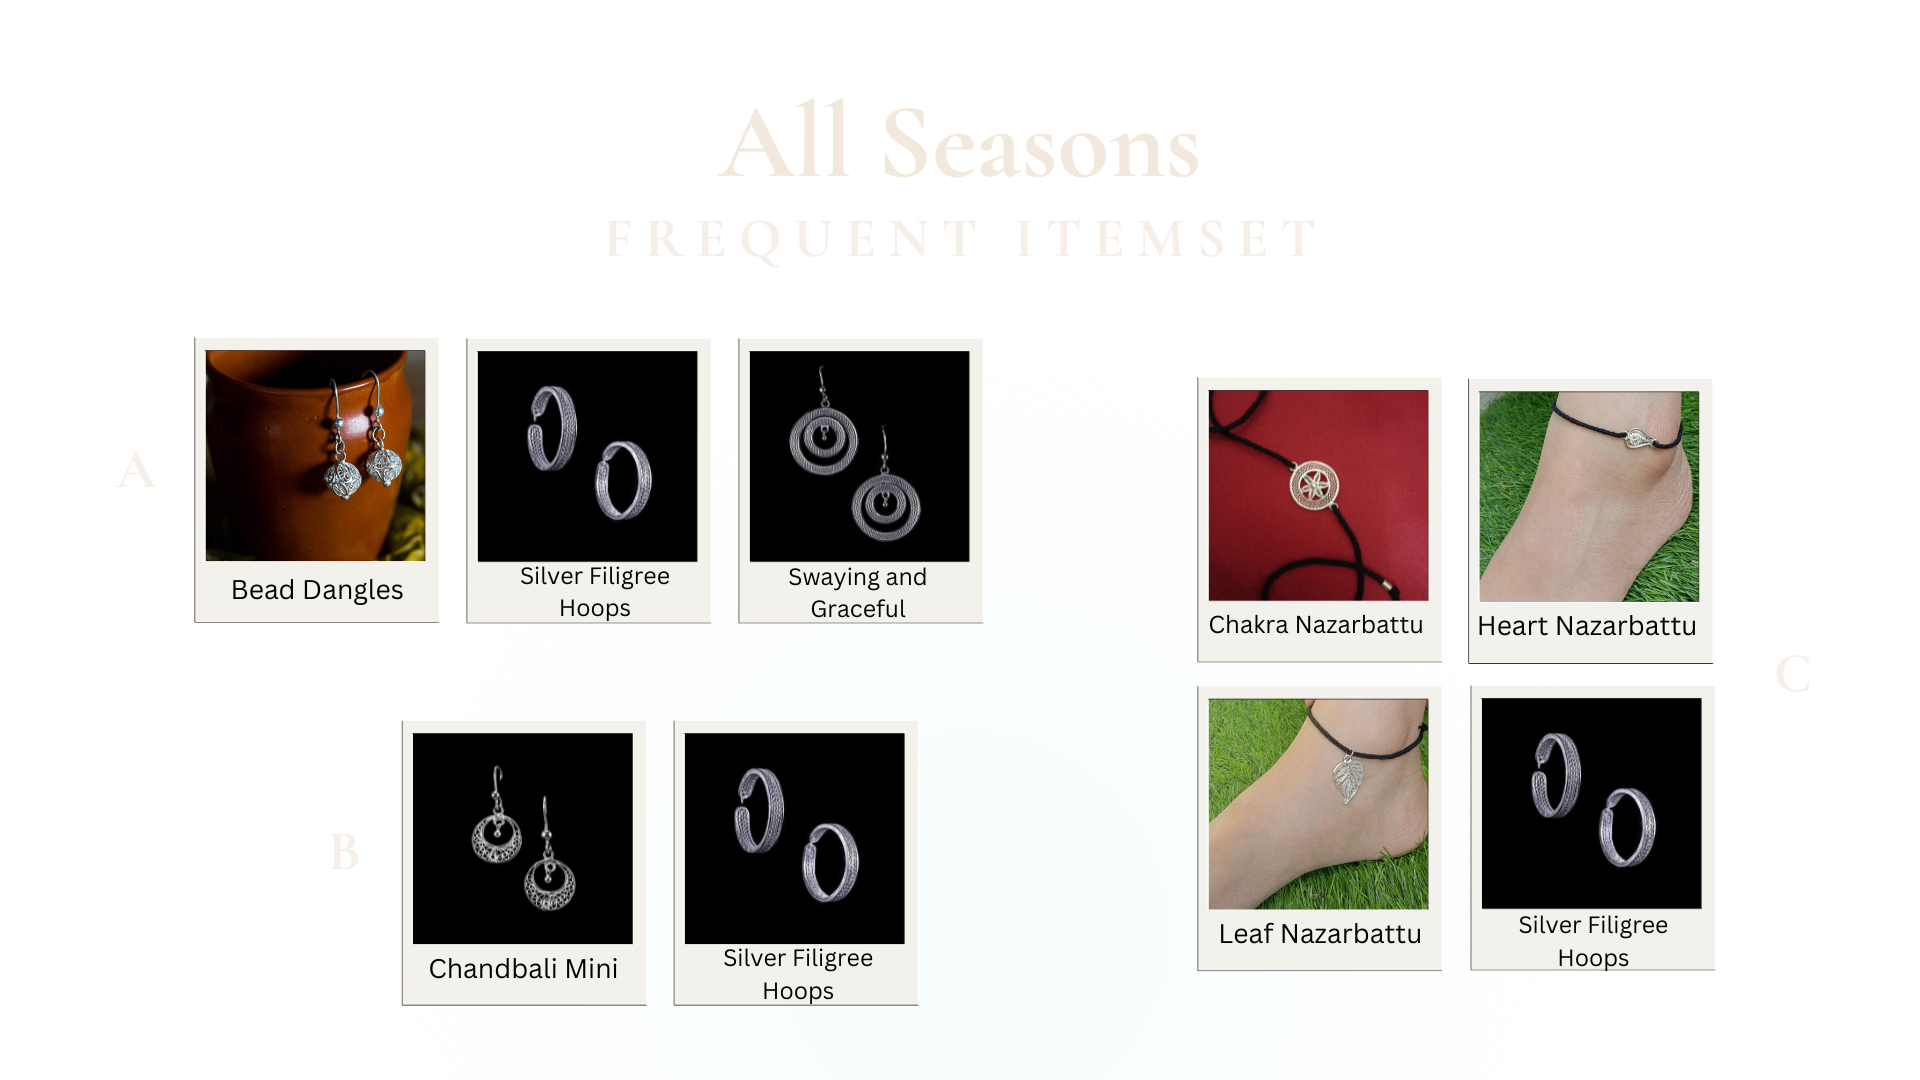
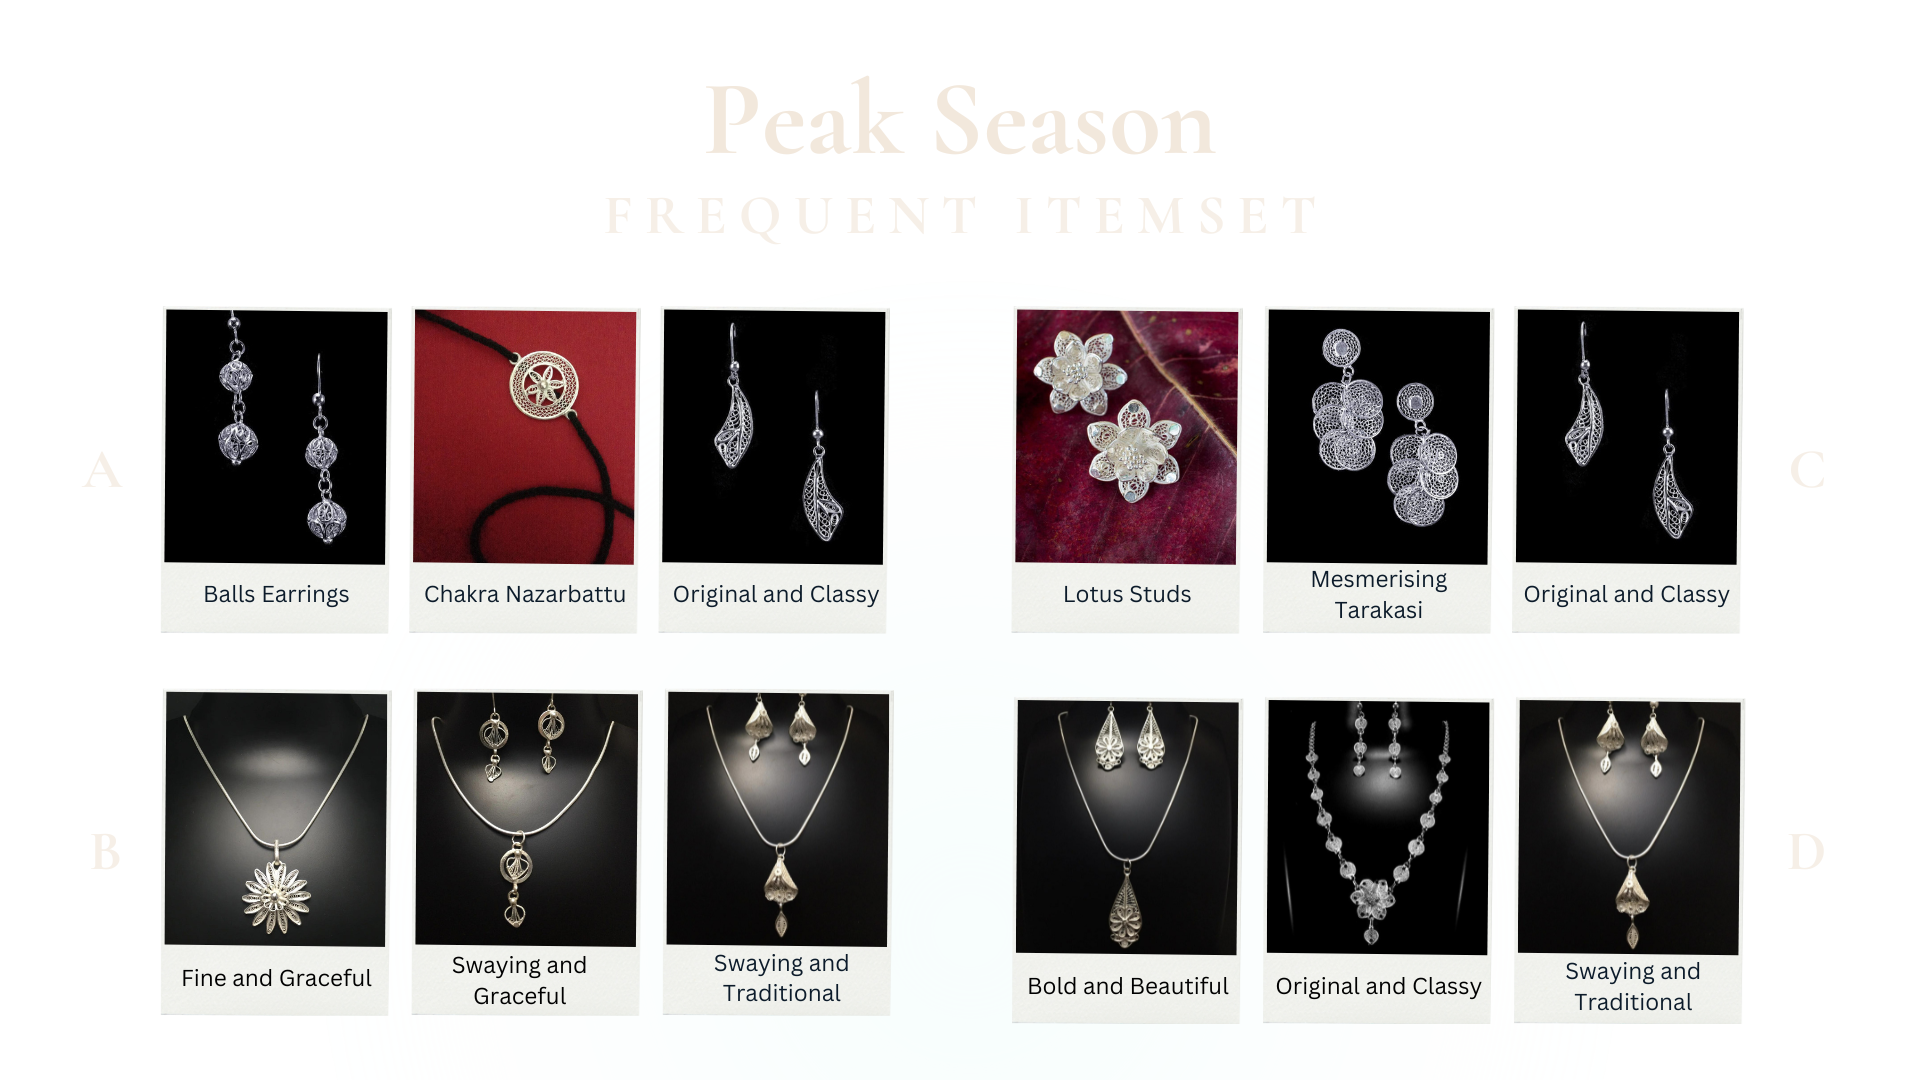
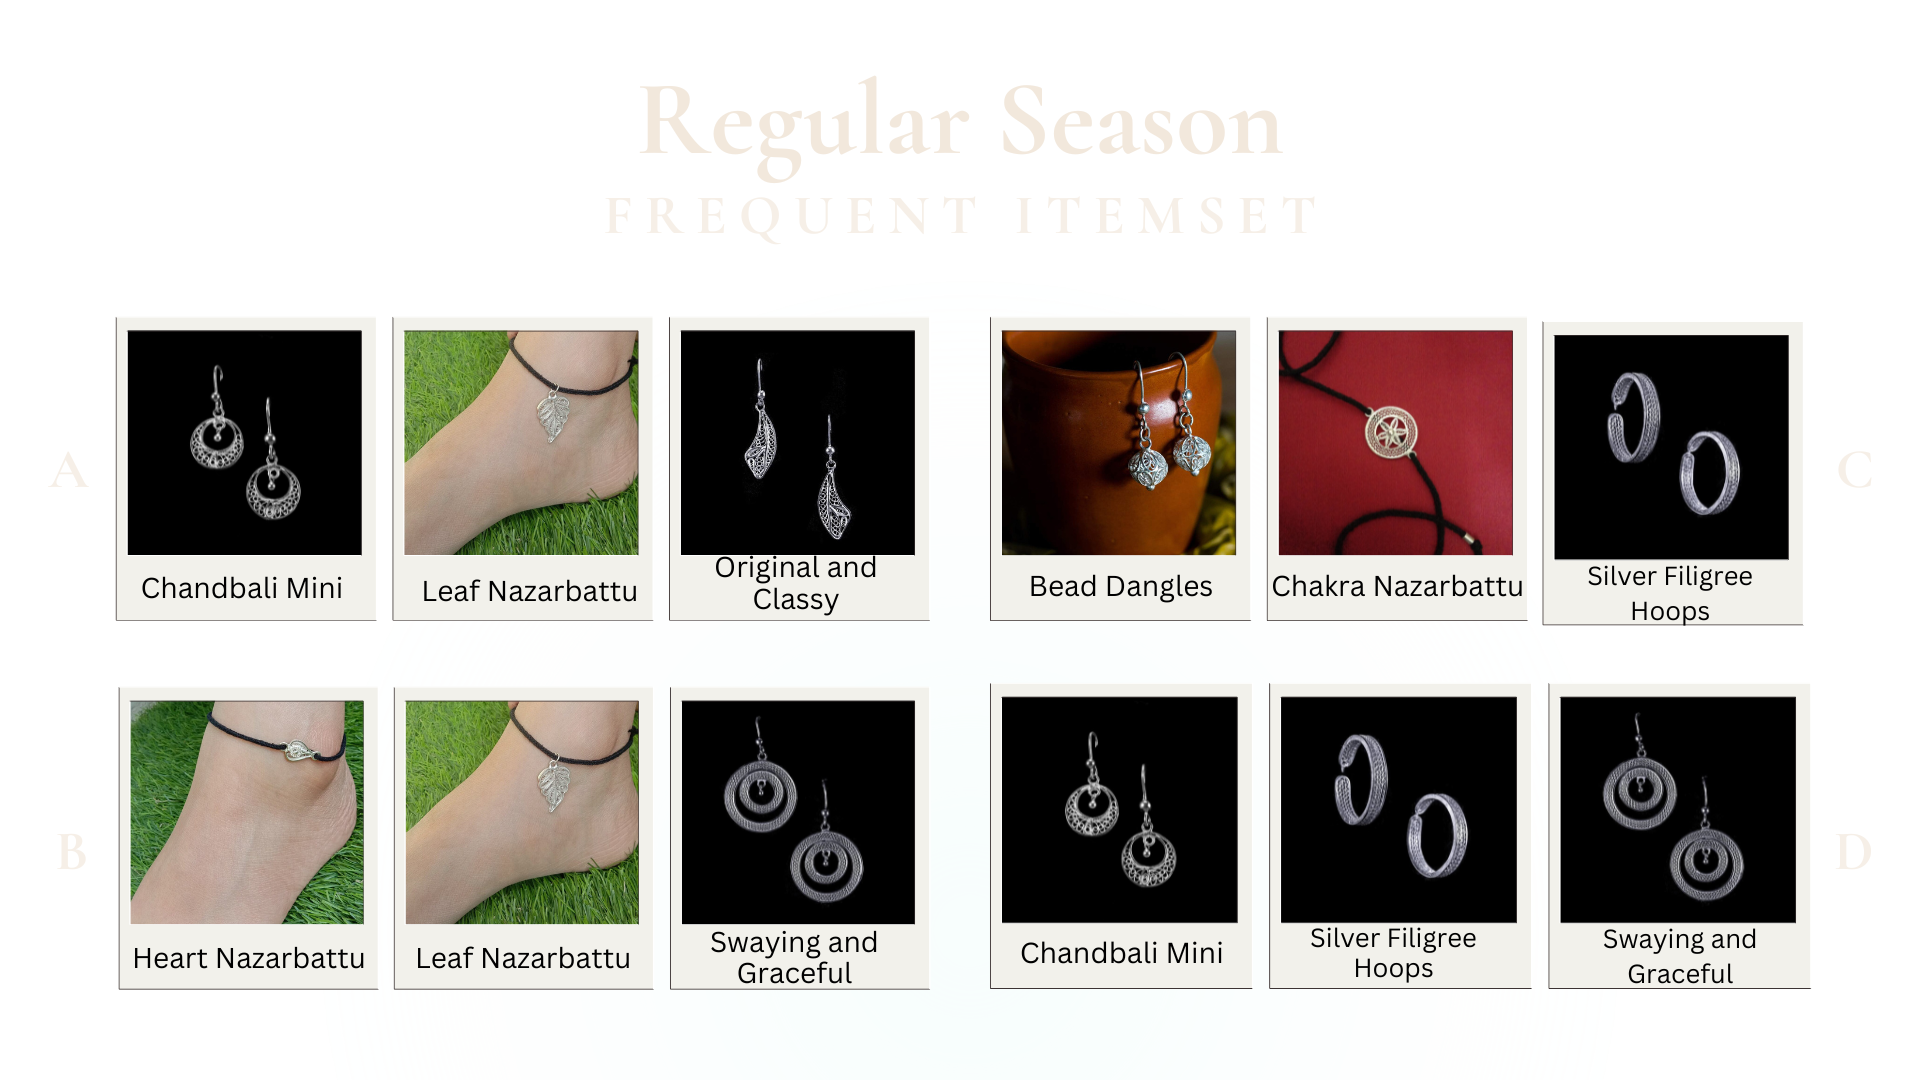